In [15]:
# this notebook will use Mark's Boulder Creek data to constrain abrasion coefficients for the predictive model

In [16]:
# Start by importing libraries.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from celluloid import Camera

In [17]:
# set up grid stuff
dx = 1
x = np.arange(0, 100, dx)
qs = np.zeros(len(x))
qs_ig = np.zeros(len(x))
qs_mtm = np.zeros(len(x))
qs_sed = np.zeros(len(x))

# set up lithologic percentages
theta = 1

theta_ig = np.zeros(len(x))
theta_mtm = np.zeros(len(x))
theta_sed = np.zeros(len(x))

theta_sed[:] = theta

# set sediment thickness
H = 2

# define some constants
q = x
c = 1
porosity = 0.45

# define abrasion coefficients
beta_ig = 0.001
beta_mtm = 5
beta_sed = 25

# set runtime
num_steps = 1000
dt = (0.2 * dx * dx) / c

# # animation stuff for plotting
# # Initialize the iteration number for the next plot
# # next_plot = plot_every <-- from animation example
# nplots = 100 # number of plots
# tplot = num_steps/nplots #use your time steps to calculate the # that you want plotted, makes plots every couple
# next_plot = 0
# # print(tplot)

# fig = plt.figure()

# ax = fig.gca()

# camera = Camera(fig)

In [18]:
# writing and running the loop

# plt.figure(figsize = (12, 8))

for i in range(10):
    
    # set constant slope
    S = 0.001
    
    # calculate total sed flux and set boundary condition
    qs[1:] = c * q[1:] * S
    qs[0] = 0
    
    # calculate flux of each lithology
    qs_ig[1:] = qs[1:] * (theta_ig[:-1])
    qs_mtm[1:] = qs[1:] * (theta_mtm[:-1])
    qs_sed[1:] = qs[1:] * (theta_sed[:-1])
    
    # set constant, mixed feed of grains
    qs_ig[0] = 0.01
    qs_mtm[0] = 0.41
    qs_sed[0] = 0.01
    
    # update percentage of each grain type
    theta_ig[:-1] += ((-1/(porosity * H)) * ((np.diff(qs_ig)/dx) + (qs_ig[1:] * beta_ig))) * dt
    theta_mtm[:-1] += ((-1/(porosity * H)) * ((np.diff(qs_mtm)/dx) + (qs_mtm[1:] * beta_mtm))) * dt
    theta_sed[:-1] += ((-1/(porosity * H)) * ((np.diff(qs_sed)/dx) + (qs_sed[1:] * beta_sed))) * dt
    
    # conserve mass
    theta_total = theta_ig + theta_mtm + theta_sed
    dtheta = theta - theta_total
    theta_ig += dtheta * theta_ig
    theta_mtm += dtheta * theta_mtm
    theta_sed += dtheta * theta_sed
    
#     if theta_ig[-2] == 0.82 and theta-mtm[-2] == 0.1:
#         continue
#     else:
#         break   
    
     # now plot if time is divisible my timeplot
    #if time[i]>= next_plot: 
        #ax.plot(xp, zp, 'k')
        #camera.snap()  # take snapshot for animation
        #next_plot += tplot #plots when the next p
    #ax.plot(x[x_height > d],
           #z_height[launch_height > d], 'r')
    
#     if i>=next_plot:
#         plt.plot(x, theta_ig, 'r')
#         plt.plot(x, theta_mtm, 'b')
#         plt.plot(x, theta_sed, 'g')
#         # camera.snap()  
#         next_plot += tplot
        
#         plt.show()
    

#     # plotting
#     for i in range(0, 10000, 1000):
#         plt.plot(x[:-1], (theta_sed[:-1]/theta_total[:-1])*100, color = 'k', label = 'sedimentary')
#         plt.plot(x[:-1], (theta_mtm[:-1]/theta_total[:-1])*100, color = 'r', label = 'metamorphic')
#         plt.plot(x[:-1], (theta_ig[:-1]/theta_total[:-1])*100, color = 'b', label = 'igneous')
#     plt.legend()
    
# plt.show()

In [19]:
# animation = camera.animate()

# # Save the object as a .gif animation
# animation.save('test_anim.gif', writer='matplotlib.animation.PillowWriter')

# # Convert to HTML5 video and play
# HTML(animation.to_html5_video())

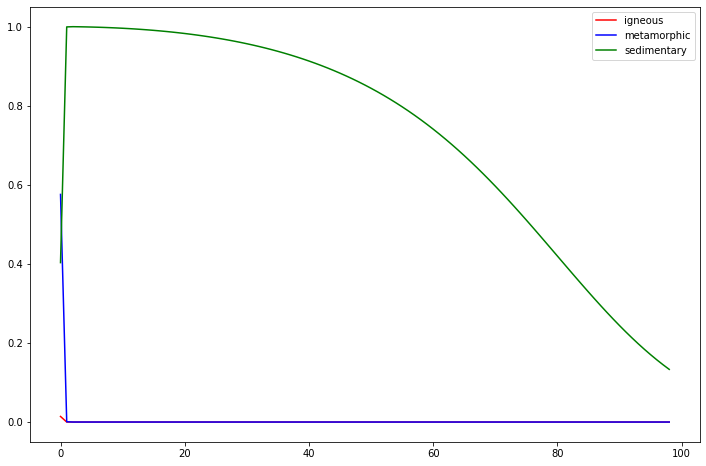

In [20]:
plt.figure(figsize = (12, 8))
plt.plot(x[:-1], theta_ig[:-1]/theta, color = 'red', label = 'igneous')
plt.plot(x[:-1], theta_mtm[:-1]/theta, color = 'blue', label = 'metamorphic')
plt.plot(x[:-1], theta_sed[:-1]/theta, color = 'green', label = 'sedimentary')
plt.legend()
plt.show()

In [21]:
i

9